In [1]:
import numpy as np
# from keras.optimizers import Adamax
# from keras.utils import np_utils
from utils import load_data
from sklearn import preprocessing
from keras.utils import np_utils
from Model_def import DFNet
from keras.optimizers import Adamax
from keras.models import load_model
import tensorflow as tf
import pandas as pd   
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import os
import pickle

import numpy as np

Using TensorFlow backend.
/home/snape/virtualenv/cs62/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/snape/virtualenv/cs62/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/snape/virtualenv/cs62/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/snape/virtualenv/cs62/lib/python3.6

In [4]:
from sklearn.model_selection import cross_val_score
model_name = "/home/snape/Documents/comp5703/trained_models/Google_Home_April18_May01.h5"
model = load_model(model_name)

dataset_dir = "/home/snape/Documents/comp5703/pickle_data/Google_Home/April18_May01/"
with open(os.path.join(dataset_dir, 'data.pkl'), 'rb') as handle:
    X = np.array(pickle.load(handle))
with open(os.path.join(dataset_dir, 'labels.pkl'), 'rb') as handle:
    y = np.array(pickle.load(handle))

print(cross_val_score(model, X, y, cv=3))

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <keras.engine.sequential.Sequential object at 0x7ff2b877e390> does not.

In [45]:
X_train, y_train, X_val, y_val, X_test, y_test = load_data(dataset_dir)
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

X_test = preprocessing.normalize(X_test)
X_test = X_test[:, :, np.newaxis]
# y_test = np_utils.to_categorical(y_test, 10)

Loading dataset from /home/snape/Documents/comp5703/pickle_data/Google_Home/Captures_5m/
Data dimensions:
X: Training data's shape :  (5994, 600)
y: Training data's shape :  (5994,)
X: Validation data's shape :  (1999, 600)
y: Validation data's shape :  (1999,)
X: Testing data's shape :  (1999, 600)
y: Testing data's shape :  (1999,)


In [49]:
y_pred=model.predict_classes(X_test)
con_mat = confusion_matrix(y_test, y_pred)

# con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()

In [50]:
con_mat

array([[104,   3,   7,   3,   3,  24,  20,   9,   1,   0],
       [  7, 167,   1,   3,   1,   6,   2,   8,   5,   1],
       [  3,   2, 162,   9,   3,   6,   3,  19,   1,   0],
       [  8,   4,  16, 150,  16,   2,   2,   7,  16,   1],
       [  3,   6,   1,  25, 107,   9,   8,   5,   4,   3],
       [ 47,   8,  26,   7,   6,  68,  19,  34,   4,   1],
       [ 18,   7,   5,   1,   2,   9, 162,   2,   8,   1],
       [ 11,   8,  24,   4,   2,  16,   7, 121,   2,   2],
       [  2,   1,   3,  18,   3,   0,   5,   0, 153,   3],
       [  0,   5,   3,   1,   1,   2,   1,   3,  19, 168]])

In [51]:
# classes=[0,1,2,3,4,5,6,7,8,9]
classes=['alarm',
        'fact',
        'joke',
        'smart_bulb',
        'smart_plug',
        'time',
        'timer',
        'weather',
        'music_stop',
        'music_play']
on_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
 
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

In [52]:
con_mat_df

,alarm,fact,joke,smart_bulb,smart_plug,time,timer,weather,music_stop,music_play
alarm,0.70,0.03,0.01,0.01,0.01,0.09,0.10,0.03,0.02,0.00
fact,0.02,0.84,0.00,0.00,0.00,0.03,0.03,0.06,0.00,0.01
joke,0.04,0.02,0.76,0.01,0.01,0.04,0.01,0.10,0.00,0.00
smart_bulb,0.06,0.02,0.04,0.40,0.10,0.06,0.02,0.07,0.23,0.00
smart_plug,0.07,0.03,0.00,0.01,0.68,0.06,0.05,0.02,0.05,0.03
time,0.29,0.06,0.04,0.00,0.03,0.40,0.05,0.11,0.01,0.00
timer,0.13,0.04,0.00,0.00,0.00,0.04,0.72,0.04,0.02,0.00
weather,0.08,0.09,0.09,0.00,0.01,0.10,0.04,0.58,0.01,0.01
music_stop,0.01,0.03,0.01,0.03,0.02,0.01,0.03,0.01,0.85,0.02
music_play,0.00,0.02,0.01,0.00,0.00,0.03,0.00,0.02,0.07,0.84


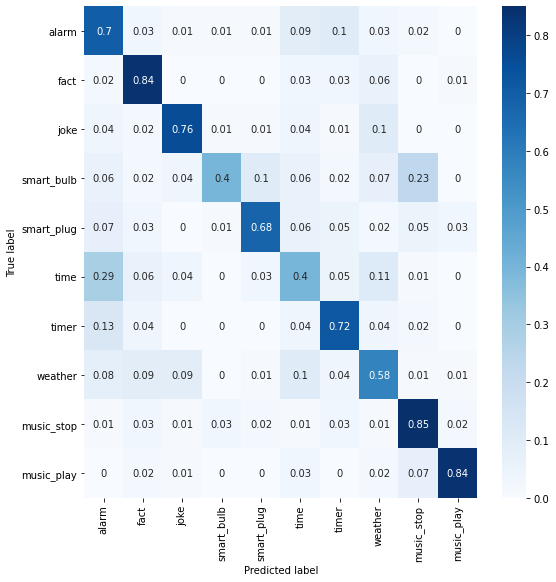

In [53]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()